In [1]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parcial III - Métodos Computacionales

### Nombre: Miguel Angel Perdomo Gaitan

---

## ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


---

# 1

(**35 puntos**) El **método de Jacobi** es un algoritmo iterativo para resolver sistemas lineales de la forma:

$$
A \mathbf{x} = \mathbf{b},
$$

donde \$A\$ es una matriz cuadrada no singular. A diferencia del método de Gauss-Seidel, Jacobi utiliza exclusivamente los valores de la iteración anterior para actualizar todas las variables simultáneamente, lo que lo hace más sencillo de paralelizar pero, en general, con una convergencia más lenta.

## Algoritmo

Dado un sistema lineal \$A \mathbf{x} = \mathbf{b}\$, el método de Jacobi consiste en:

1. Elegir un vector inicial \$\mathbf{x}^{(0)}\$ (por ejemplo, el vector nulo).

2. Para cada iteración \$k\$ y cada componente \$i = 1, 2, ..., n\$, actualizar:

$$
x_i^{(k)} = \frac{1}{a_{ii}} \left( b_i - \sum_{\substack{j=1 \\ j \neq i}}^{n} a_{ij} x_j^{(k-1)} \right)
$$

3. Repetir hasta que se cumpla un criterio de convergencia, como:

$$
\| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)} \| < \text{tolerancia}
$$

---

**a)** Escriba una función llamada `jacobi` que resuelva el sistema lineal \$A \mathbf{x} = \mathbf{b}\$ usando el método iterativo de Jacobi. La función debe aceptar como argumentos:

* La matriz \$A\$ y el vector \$\mathbf{b}\$,
* Una tolerancia (por defecto \$1\times 10^{-10}\$),
* Un número máximo de iteraciones.

Debe retornar la solución aproximada \$\mathbf{x}\$ y el número de iteraciones realizadas.

---

**b)** Aplique su función para resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
10x_1 - x_2 + 2x_3 = 6 \\[2mm]
-2x_1 + 11x_2 - x_4 = 25 \\[2mm]
3x_1 - x_2 + 10x_3 - x_4 = -11 \\[2mm]
2x_2 - x_3 + 8x_4 = 15
\end{cases}
$$

Use como vector inicial \$\mathbf{x}^{(0)} = \[0, 0, 0, 0]^T\$. Imprima la solución aproximada y el número de iteraciones necesarias para adquirir la convergencia.

---

**c)** Compare su solución con `np.linalg.solve`. ¿Qué tan cercana es la solución iterativa a la exacta? Para esto, realice un gráfico del error usando la norma euclidiana (`np.linalg.norm`) en función de la tolerancia y otro del número de iteraciones, empleando un `np.logspace(-18, -1, 18)`.

---



In [2]:
def jacobi(A,b, tol=1e-10, maxiter=1000):
  """
  Resuelve un sistema de ecuaciones lineales empleando el método de jacobi
  Entradas:
    A: matríz cuadrada -> ndarray
    b: vector valores independientes -> array
  Salida:
  x: vector solución -> array
  """
  #se verifica que la matriz sea cuadrada
  n=A.shape
  if n[0]!=n[1]:
    raise ValueError("La matriz ingresada no es cuadrada")
  #se define la cantidad de elementos de una fila de A
  N=n[0]
  #se crea un vector de soluciones inicial
  x=np.zeros(N)
  #se inicializa k=1
  k=1
  #se inicializa una suma en cero
  suma=0
  #se inicializa el ciclo for
  for i in range(N):
    #se crea una copia de vector x
    x_iter=x.copy()
    #se inicializa un segundo ciclo for para las columnas
    for j in range(N):
      #se crea una copia de vector x
      x_iter=x.copy()
      #se realiza la condición para la sumatoria
      if j!=i or j==0:
        termino= (A[i,j])*((x[j])**(k-1))
        #se añade el término a la suma
        suma+=termino
    #se encuentra el x en la posición i
    x=(1/(A[i,i])*(b[i]-suma)) #se pone primero en esta variable transitoria
    x_iter[i]=x**k #se guarda en una copia del vector soluciones
    #se actualiza la iteración
    k+=1
  #se actualiza el vector de soluciones
  x=x_iter
  #se calcula el error
  error=la.norm(x_iter-x)
  #se verifica que se cumpla la tolerancia
  if error<tol:
    return x #si se cumplió la tolerancia que regrese x
  return x #si no se cumple tol igualmente regresa el x encontrado

In [3]:
#se crea la matriz A y vector b para comparar soluciones
#matríz A
A=np.array([
    [10,-1,2,0],
    [-2,11,0,-1],
    [3,-1,10,-1],
    [0,2,-1,8]
])
#se crea el vector b
b=np.array([6,25,-11,15])
#se resuleve con la.solve
sol=la.solve(A,b)
#se resuleve numericamente
sol_num=jacobi(A,b,tol=1e-10,maxiter=1000)

IndexError: invalid index to scalar variable.

# 2

(**50 puntos**) El sistema **masa-resorte con fricción** es un modelo clásico en física que describe el movimiento de una masa sujeta a una fuerza restauradora (resorte) y una fuerza disipativa (fricción o viscosidad). Su dinámica está gobernada por la ecuación diferencial de segundo orden:

$$
m y''(t) + c y'(t) + k y(t) = 0,
$$

donde:

* $m$ es la masa del objeto,
* $c$ es el coeficiente de fricción (amortiguamiento),
* $k$ es la constante del resorte,
* $y(t)$ es la posición de la masa respecto a su equilibrio.

---

**a)** Reformule esta ecuación como un sistema de primer orden adecuado para ser resuelto con `solve_ivp`. Explique mediante una función explicita y realice su documentación.

---

**b)** Considere el siguiente caso:

* Masa: $m = 1$ kg
* Constante del resorte: $k = 4$ N/m
* Coeficiente de fricción: $c = 0.5$ N·s/m
* Condiciones iniciales: $y(0) = 1$, $y'(0) = 0$
* Intervalo de tiempo: $t \in [0, 20]$

Utilice `solve_ivp` para resolver el sistema y grafique $y(t)$ como $y'(t)$. Interprete el comportamiento del sistema.

---

**c)** Simule dos escenarios adicionales:

1. Sin fricción: $c = 0$
2. Con fuerte fricción: $c = 4.5$

Grafique los tres casos \$y(t)\$ en una misma figura y compare los regímenes: **no amortiguado**, **subamortiguado**, y **sobreamortiguado**.

---

**d)** Para cada uno de los tres casos, calcule la **energía mecánica total** del sistema en función del tiempo. La energía total se define como la suma de energía cinética y potencial:

$$
E(t) = \frac{1}{2} m v^2 + \frac{1}{2} k y^2
$$

Grafique $E(t)$ para los tres escenarios simulados. Analice y compare el comportamiento de la energía en cada caso. ¿Qué sucede con la energía a lo largo del tiempo? ¿Cómo se relaciona esto con el valor del coeficiente de fricción $c$?


In [17]:
#se define la función para el sistema dado
def masa_resorte_friccion(t,y,m,k,c):
  """
  Implementa la ecuación diferencial del sistema masa-resorte con fricción
  Entradas:
  t: tiempo -> float
  y: vector de estado -> array
    siendo y1=y, y2=dy/dt
    c: fricción -> float
    m: masa -> float
    K: constante elástica -> float
  Salidas:
  [y2,y3]: derivadas primera y segunda con respecto al tiempo
  """
  #se desenpaquetan el vector
  y,y_prime=y
  y1=y
  y2=y_prime
  y3=-(k/m)*y1-(c/m)*y2
  return [y2,y3]


In [18]:
#se declaran las constantes dadas
m_1=1 #kg
c_1=0.5 #Ns/m
k_1=4 #N/m
#se empaquetan en un array
parametros=[m_1,k_1,c_1]
#se declaran las condiciones iniciales dadas
y_0=1
y_prime=0
#se empaquetan en un array
y0=np.array([y_0,y_prime])
#array de tiempos
t_values=np.linspace(0,20,1000)
#se resuelve con solve_ivp
sol_1= solve_ivp(fun=masa_resorte_friccion,t_span= (0,20),t_eval=t_values,y0=y0,args=[m_1,k_1,c_1])

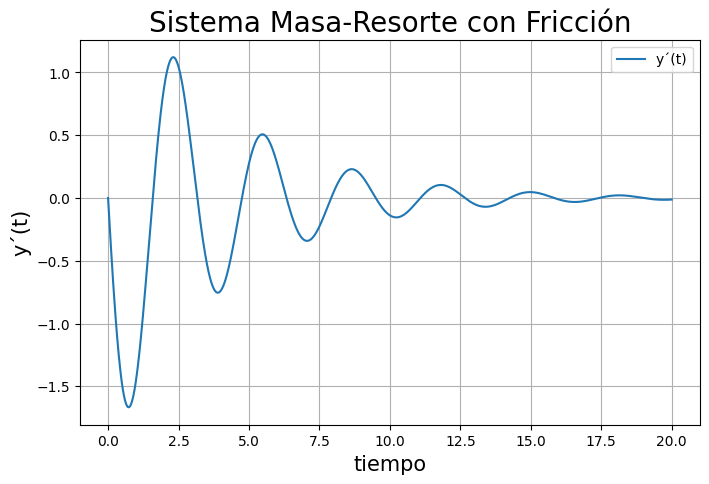

In [14]:
#se realiza la grafica
plt.figure(figsize=(8,5))
plt.plot(t_values, sol_1.y[1], label="y´(t)")
plt.title("Sistema Masa-Resorte con Fricción", fontsize=20)
plt.ylabel("y´(t)", fontsize=15)
plt.xlabel("tiempo", fontsize=15)
plt.legend()
plt.grid()
plt.show()

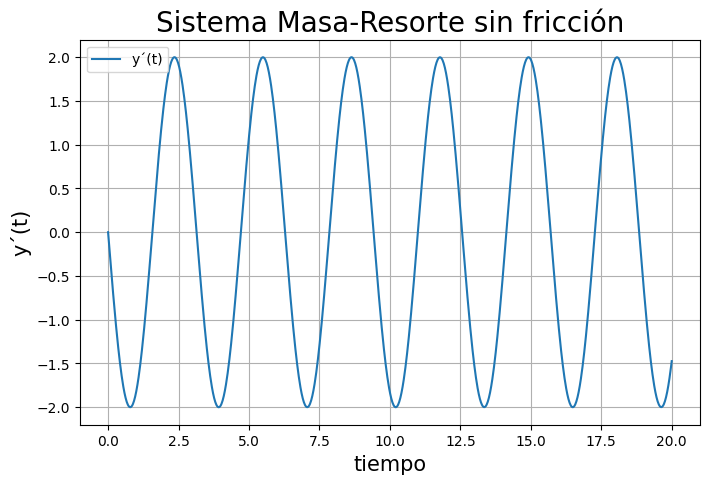

In [19]:
#caso uno c=0
#se hace nuevamente los parámetros
c_2=0
parametros_2=np.array([m_1,k_1,c_2]) #c=0
sol_2=solve_ivp(masa_resorte_friccion,(0,20), t_eval=t_values,y0=y0,args=[m_1,k_1,c_2])
#se realiza la grafica
plt.figure(figsize=(8,5))
plt.plot(t_values, sol_2.y[1], label="y´(t)")
plt.title("Sistema Masa-Resorte sin fricción", fontsize=20)
plt.ylabel("y´(t)", fontsize=15)
plt.xlabel("tiempo", fontsize=15)
plt.legend()
plt.grid()
plt.show()

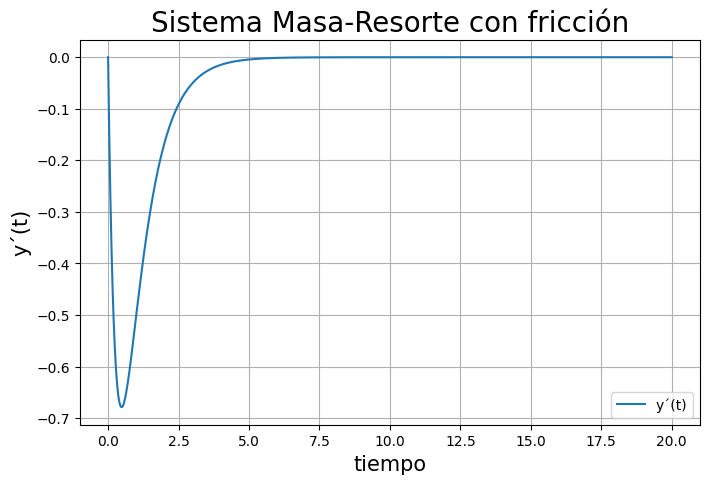

In [21]:
#caso uno c=4.5
#se hace nuevamente los parámetros
c_3=4.5
parametros_2=np.array([m_1,k_1,c_3]) #c=4.5
sol_3=solve_ivp(masa_resorte_friccion,(0,20), t_eval=t_values,y0=y0,args=[m_1,k_1,c_3])
#se realiza la grafica
plt.figure(figsize=(8,5))
plt.plot(t_values, sol_3.y[1], label="y´(t)")
plt.title("Sistema Masa-Resorte con fricción", fontsize=20)
plt.ylabel("y´(t)", fontsize=15)
plt.xlabel("tiempo", fontsize=15)
plt.legend()
plt.grid()
plt.show()

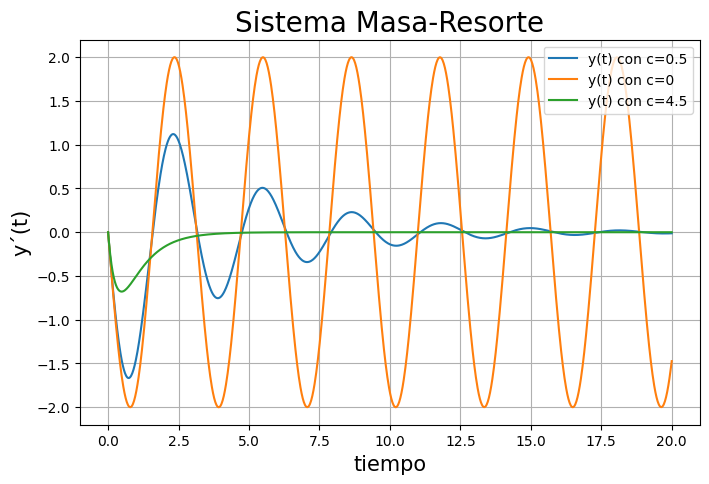

In [22]:
#se gráfica y(t) para los tres casos

plt.figure(figsize=(8,5))
plt.plot(t_values, sol_1.y[1], label="y(t) con c=0.5")
plt.plot(t_values, sol_2.y[1], label="y(t) con c=0")
plt.plot(t_values, sol_3.y[1], label="y(t) con c=4.5")
plt.title("Sistema Masa-Resorte", fontsize=20)
plt.ylabel("y´(t)", fontsize=15)
plt.xlabel("tiempo", fontsize=15)
plt.legend()
plt.grid()
plt.show()

In [35]:
#se calcula la energía para cada sistema
#sistema con c=0.5
energia_1=[]
for i in range(sol_1.y[0].shape[0]):
  energia=0.5*m_1*(sol_1.y[1,i])**2 + 0.5*k_1*(sol_1.y[0,i])**2
  energia_1.append(energia)
#sistema con c=0
energia_2=[]
for i in range(sol_2.y[0].shape[0]):
  energia=0.5*m_1*(sol_2.y[1,i])**2 + 0.5*k_1*(sol_2.y[0,i])**2
  energia_2.append(energia)
  #sistema con c=0.5
energia_3=[]
for i in range(sol_3.y[0].shape[0]):
  energia=0.5*m_1*(sol_3.y[1,i])**2 + 0.5*k_1*(sol_3.y[0,i])**2
  energia_3.append(energia)


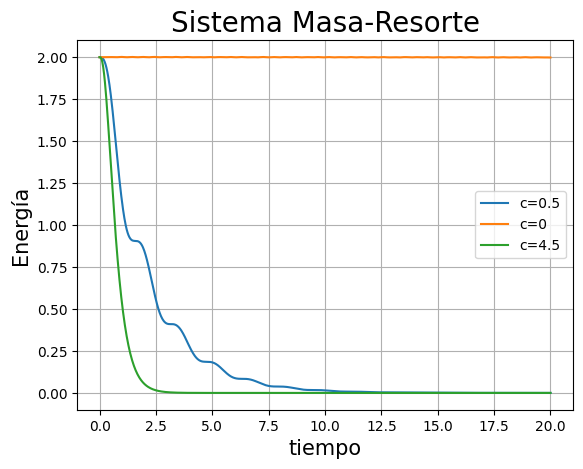

In [37]:
#se gráfica
plt.plot(t_values,energia_1,label="c=0.5")
plt.plot(t_values,energia_2,label="c=0")
plt.plot(t_values,energia_3,label="c=4.5")
plt.title("Sistema Masa-Resorte", fontsize=20)
plt.ylabel("Energía", fontsize=15)
plt.xlabel("tiempo", fontsize=15)
plt.legend()
plt.grid()
plt.show()

Entonces a mayor fricción mayor pérdida de energía, si c=0 entonces la energía se conserva

# 3

**(15 puntos)** Sea $A$ una matriz cuadrada de tamaño $n \times n$. Dos propiedades fundamentales de los autovalores de $A$ son:

1. **Determinante**:

   $$
   \det(A) = \prod_{i=1}^{n} \lambda_i
   $$

2. **Traza**:

   $$
   \mathrm{tr}(A) = \sum_{i=1}^{n} \lambda_i
   $$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando un conjunto de matrices aleatorias $A$ de $5\times 5$ (1000 matrices diferentes), verifique numéricamente ambas propiedades. Puede emplear las funciones `np.linalg.det`, `np.trace` y `np.linalg.eigvals`.


In [47]:
#matriz aleatoria
A=np.random.randint(0,9,size=(5,5))
print(A)
#primero se calculan los valores propios
valores_propios=la.eigvals(A)
#se inializa la suma
suma=0
#se calculan la diagonal de los valores propios
for i in range(0,5):
  valor=valores_propios[i]
  suma+=valor
print(suma)
#se verifica el determinante
det=la.det(A)
print(det)

[[4 6 3 3 1]
 [7 0 3 1 0]
 [0 8 1 2 1]
 [1 7 6 2 2]
 [7 8 0 7 1]]
(8.000000000000016+0j)
-100.00000000000013
